# APS360: Introduction to PyTorch

## Introduction

In tutorial 1, we reviewed basics of Python and how Numpy extends vanilla Python for many tasks in scientific computing. 

In this tutorial, we will go over two libraries, Matplotlib for data visualization and PyTorch for machine learning.

## Matplotlib

Matplotlib is a plotting library. This section gives a brief introduction to the `matplotlib.pyplot` module, which provides a plotting system similar to that of MATLAB. 

In [1]:
import numpy as np

import matplotlib.pyplot as plt

### Plotting

The most important function in `matplotlib.pyplot` is `plot`, which allows you to plot 2D data. Here is a simple example:

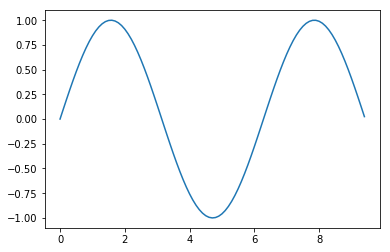

In [2]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)

With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

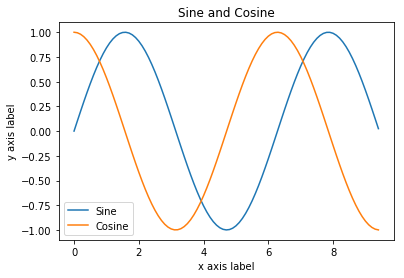

In [3]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Can plot multiple graphs
plt.plot(x, y_sin)
plt.plot(x, y_cos)

# Set x and y label
plt.xlabel('x axis label')
plt.ylabel('y axis label')

# Set title and legend
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])

### Subplots 

You can plot different things in the same figure using the subplot function. Here is an example:

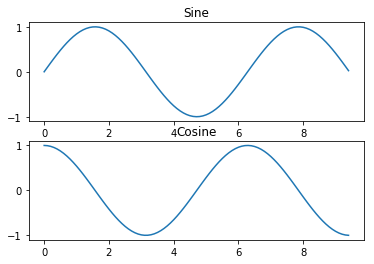

In [4]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1.
# This sets the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active
plt.subplot(2, 1, 2)

# Make the second plot.
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.show()

### Images

`imshow` function from `pyplot` module can be used to show images. For example:

In [5]:
img = plt.imread('cute-kittens.jpg')

print(img)

[[[  2   2   2]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  1   1   1]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  1   1   1]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[106 102  91]
  [ 95  88  78]
  [103  94  85]
  ...
  [137 126 120]
  [141 130 124]
  [146 135 129]]

 [[ 94  90  79]
  [ 99  92  82]
  [109 100  91]
  ...
  [120 109 103]
  [121 110 104]
  [126 115 109]]

 [[103  99  88]
  [102  95  85]
  [101  92  83]
  ...
  [128 117 111]
  [129 118 112]
  [134 123 117]]]


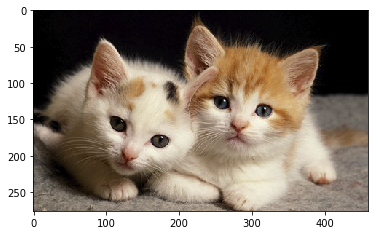

In [6]:
# Show the original image
plt.imshow(img) # Similar to plt.plot but for image
plt.show()

Note that each cells in an image is composed of 3 color channels (i.e. RGB color). Often the last axis is used for color channels, in the order of red, green, and blue. 

In [7]:
print(img.shape) # 460 width x 276 height x RGB (3 channels)

(276, 460, 3)


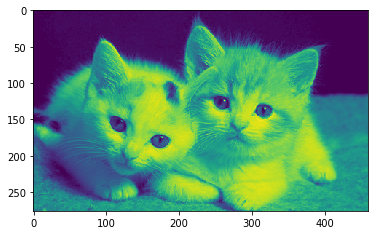

In [8]:
# Displaying only red color channel

plt.imshow(img[:, :, 0])
plt.show()

## PyTorch

PyTorch is a Python-based scientific computing package. PyTorch is currently, along with Tensorflow, one of the most popular machine learning library. 

PyTorch, at its core, is similar to Numpy in a sense that they both 
1. try to make it easier to write codes for scientific computing
2. achieve improved performance over vanilla Python by leveraging highly optimized C back-end.

However, compare to Numpy, PyTorch offers much better GPU support and provides many high-level features for machine learning. Technically, Numpy can be used to perform almost every thing PyTorch does. However, Numpy would be a lot slower than PyTorch, especially with CUDA GPU, and it would take more effort to write machine learning related code compared to using PyTorch.

### Tensor

Mathematically speaking, tensor is a mathematical object for representing multi-dimensional arrays and tensor can be thought of as generalization of vectors and matrices. Tensor extends vector(1-D grid of numbers) and matrix(2-D grid of numbers) to represent any dimensional structure. 

In PyTorch, `tensor` is similar to Numpy's `ndarray` but can be used on a GPU to accelerate computing.

`tensor` can be created using initialization functions, similar to ones for `ndarray`.

In [9]:
import torch

In [10]:
x = torch.empty(5, 3)
print(x)

tensor([[0.0000e+00, 2.0000e+00, 0.0000e+00],
        [2.0000e+00, 1.8217e-44, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 9.2196e-41],
        [0.0000e+00, 0.0000e+00, 0.0000e+00]])


In [11]:
x = torch.rand(5, 3)
print(x)

tensor([[0.7518, 0.0221, 0.1475],
        [0.6794, 0.4572, 0.6822],
        [0.3718, 0.1297, 0.7393],
        [0.9782, 0.9275, 0.1059],
        [0.3904, 0.8096, 0.8896]])


In [12]:
x = torch.zeros(5, 3, dtype=torch.long) # explicitely specify data type
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


`tensor` can also be created from array-like data such as `ndarray` or other `tensors`

In [13]:
x = torch.tensor([5.5, 3]) # From Python list
print(x)

tensor([5.5000, 3.0000])


In [14]:
np_array = np.arange(6).reshape((2, 3)) 
torch_tensor = torch.from_numpy(np_array) # From ndarray

print(np_array)
print(torch_tensor)

np_array_2 = torch_tensor.numpy() # Back to ndarray from tensor
print(np_array_2)

[[0 1 2]
 [3 4 5]]
tensor([[0, 1, 2],
        [3, 4, 5]])
[[0 1 2]
 [3 4 5]]


### Operations

Operations on `tensor` use similar syntax as in Numpy

In [15]:
x = torch.ones(5, 3)
print(x)

x *= 2
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])


In [16]:
y = torch.rand(5, 3)
print(y)

print(x + y)
print(x * y)

tensor([[0.5417, 0.8398, 0.7194],
        [0.1662, 0.6120, 0.1901],
        [0.3853, 0.8248, 0.2068],
        [0.9483, 0.7665, 0.0429],
        [0.8464, 0.6350, 0.2197]])
tensor([[2.5417, 2.8398, 2.7194],
        [2.1662, 2.6120, 2.1901],
        [2.3853, 2.8248, 2.2068],
        [2.9483, 2.7665, 2.0429],
        [2.8464, 2.6350, 2.2197]])
tensor([[1.0833, 1.6796, 1.4388],
        [0.3323, 1.2241, 0.3801],
        [0.7706, 1.6495, 0.4137],
        [1.8965, 1.5329, 0.0858],
        [1.6928, 1.2701, 0.4395]])


In [17]:
# Using different syntax for the same operations above
print(torch.add(x, y))

tensor([[2.5417, 2.8398, 2.7194],
        [2.1662, 2.6120, 2.1901],
        [2.3853, 2.8248, 2.2068],
        [2.9483, 2.7665, 2.0429],
        [2.8464, 2.6350, 2.2197]])


In [18]:
# Inplace operation
x.add_(y)
print(x)

tensor([[2.5417, 2.8398, 2.7194],
        [2.1662, 2.6120, 2.1901],
        [2.3853, 2.8248, 2.2068],
        [2.9483, 2.7665, 2.0429],
        [2.8464, 2.6350, 2.2197]])


In [19]:
# Using the same indexing syntax from Python list and Numpy
print(x[1:4, :])

tensor([[2.1662, 2.6120, 2.1901],
        [2.3853, 2.8248, 2.2068],
        [2.9483, 2.7665, 2.0429]])


In [20]:
print(x.shape) # Similar to Numpy

torch.Size([5, 3])


For more details, check https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py